
## Assignmnet 11: Decision Trees & Random Forests

### Author: Mahlet Melese
### Date: August 1, 2023

## 1. Introduction


- The primary objective of this project is to use decision tree and random forest for data classifcation.
- The dataset comprised of information pertaining to
NY State High School graduation metrics for the 2018-2019 school year (https://data.nysed.gov/downloads.php)

## 2. Exploratory Data Analysis 

#### Import libraries

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Read dataset from my github  repo and creat pandas dataframe

In [185]:
# Downloading the csv file from my GitHub repo
data_url = "https://raw.githubusercontent.com/mahletbirku/-DAV-6150/main/M11_Data%20(1).csv" 
df = pd.read_csv(data_url, header=0)
df

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,18,Not Migrant,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,20,Homeless,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,21,Not Homeless,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,23,Not in Foster Care,-,-,-,-,-,-,-


- Get columns name

In [186]:
df.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt',
       'reg_pct', 'dropout_cnt', 'dropout_pct'],
      dtype='object')

- Drop some irrelevant columns and change the format of the the dataframe which has columns with percent signs

In [191]:
df = df[['aggregation_index',
       'nrc_code', 'county_code',
       'nyc_ind', 'subgroup_code',
       'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt',
       'reg_pct', 'dropout_cnt', 'dropout_pct']].copy()

# remove percentage symbol
df['grad_pct'] = df['grad_pct'].str.rstrip('%')
df['reg_pct'] = df['reg_pct'].str.rstrip('%')
df['dropout_pct'] = df['dropout_pct'].str.rstrip('%')

df

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,3,3,1,0,1,658,464,71,310,47,148,22
1,3,3,1,0,2,324,246,76,169,52,65,20
2,3,3,1,0,3,334,218,65,141,42,83,25
3,3,3,1,0,4,-,-,-,-,-,-,-
4,3,3,1,0,5,367,248,68,183,50,91,25
...,...,...,...,...,...,...,...,...,...,...,...,...
73147,3,4,68,0,18,-,-,-,-,-,-,-
73148,3,4,68,0,20,-,-,-,-,-,-,-
73149,3,4,68,0,21,-,-,-,-,-,-,-
73150,3,4,68,0,23,-,-,-,-,-,-,-


- Convert non-values into NaN so as to remove rows with those values.

In [192]:
# fill "-" to NAN values
df = df.apply (pd.to_numeric, errors='coerce')
df

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,3,3,1,0,1,658.0,464.0,71.0,310.0,47.0,148.0,22.0
1,3,3,1,0,2,324.0,246.0,76.0,169.0,52.0,65.0,20.0
2,3,3,1,0,3,334.0,218.0,65.0,141.0,42.0,83.0,25.0
3,3,3,1,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,3,1,0,5,367.0,248.0,68.0,183.0,50.0,91.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73147,3,4,68,0,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73148,3,4,68,0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73149,3,4,68,0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73150,3,4,68,0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data integrity issues



In [193]:
# fill NAN values with mean
df = df.fillna(df.mean())
df

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,3,3,1,0,1,658.000000,464.000000,71.000000,310.000000,47.000000,148.000000,22.000000
1,3,3,1,0,2,324.000000,246.000000,76.000000,169.000000,52.000000,65.000000,20.000000
2,3,3,1,0,3,334.000000,218.000000,65.000000,141.000000,42.000000,83.000000,25.000000
3,3,3,1,0,4,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
4,3,3,1,0,5,367.000000,248.000000,68.000000,183.000000,50.000000,91.000000,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
73147,3,4,68,0,18,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
73148,3,4,68,0,20,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
73149,3,4,68,0,21,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
73150,3,4,68,0,23,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049



##### Check null values

- I checked null values which is a fundamental part of data cleaning. I will use Pandas. isnull() and .sum() functions together to display count of missing values of each attribute.



In [194]:
print (df.isnull().sum())

aggregation_index    0
nrc_code             0
county_code          0
nyc_ind              0
subgroup_code        0
enroll_cnt           0
grad_cnt             0
grad_pct             0
reg_cnt              0
reg_pct              0
dropout_cnt          0
dropout_pct          0
dtype: int64


- Here, we can see that there is no missing value

#### Create a new categorical indicator variable

In [195]:
# Generate result using pandas
result = []
median=df["reg_pct"].median()
for value in df["reg_pct"]:
    if value < 1/2*(median):
        result.append("low")
    elif (value >  1/2*(median)) and (value <= 3/2*(median)):
        result.append("medium")
    else:
        result.append("high")

In [196]:
df["reg_pct_level"] = result  
df

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct,reg_pct_level
0,3,3,1,0,1,658.000000,464.000000,71.000000,310.000000,47.000000,148.000000,22.000000,medium
1,3,3,1,0,2,324.000000,246.000000,76.000000,169.000000,52.000000,65.000000,20.000000,medium
2,3,3,1,0,3,334.000000,218.000000,65.000000,141.000000,42.000000,83.000000,25.000000,medium
3,3,3,1,0,4,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,medium
4,3,3,1,0,5,367.000000,248.000000,68.000000,183.000000,50.000000,91.000000,25.000000,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,3,4,68,0,18,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,medium
73148,3,4,68,0,20,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,medium
73149,3,4,68,0,21,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,medium
73150,3,4,68,0,23,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,medium


- Now we can see that a new column has been added

## 3-4. Data Preparation and Prepped Data Review

#### Check the dataset shape

In [197]:
# check the result
df.shape

(73152, 13)

#### Let's get some of the basic statistics of the wine data.

- From the table above, for each feature we can get the mean, standard deviation, count, and other basic information that can tell about the data.

In [198]:
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
std,0.0,1.203507,20.588044,0.228479,7.213138,324.013342,266.071934,11.547011,166.285085,12.611456,36.917617,7.113052
min,3.0,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000,58.000000,50.000000,84.406614,24.000000,42.000000,3.000000,4.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
75%,3.0,5.000000,57.000000,0.000000,18.000000,192.120079,161.178354,90.000000,86.804708,45.000000,16.239225,7.963049
max,3.0,6.000000,68.000000,1.000000,25.000000,9176.000000,7540.000000,100.000000,4752.000000,100.000000,1091.000000,100.000000


#### Data types of all columns
- Pandas.dtypes function helps us to display the data types of all columns as a series.


In [199]:
# Check the data types

df.dtypes

aggregation_index      int64
nrc_code               int64
county_code            int64
nyc_ind                int64
subgroup_code          int64
enroll_cnt           float64
grad_cnt             float64
grad_pct             float64
reg_cnt              float64
reg_pct              float64
dropout_cnt          float64
dropout_pct          float64
reg_pct_level         object
dtype: object

### Visualization

#### Histogram

- A histogram is a value distribution plot of numerical columns. Let's do a histogram of 16 attributes 

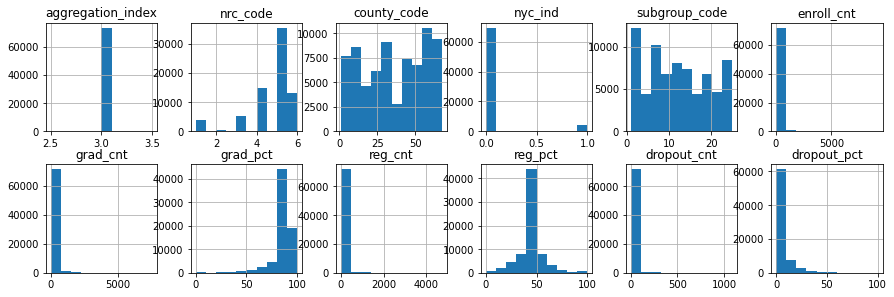

In [200]:
df.hist(bins=10, figsize=(15, 15), layout=(6,6));


- The follwoing is the hostogram of the different features.

# 5. Decision Tree and Random Forest

- Decision Trees and Random Forests are machine learning algorithms used for classification

- Map target classes to int

In [201]:
df['reg_pct_level'] = df['reg_pct_level'].map({'low': 0, 'medium': 1,'high': 2 })

In [202]:
df

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct,reg_pct_level
0,3,3,1,0,1,658.000000,464.000000,71.000000,310.000000,47.000000,148.000000,22.000000,1
1,3,3,1,0,2,324.000000,246.000000,76.000000,169.000000,52.000000,65.000000,20.000000,1
2,3,3,1,0,3,334.000000,218.000000,65.000000,141.000000,42.000000,83.000000,25.000000,1
3,3,3,1,0,4,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,1
4,3,3,1,0,5,367.000000,248.000000,68.000000,183.000000,50.000000,91.000000,25.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,3,4,68,0,18,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,1
73148,3,4,68,0,20,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,1
73149,3,4,68,0,21,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,1
73150,3,4,68,0,23,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,1


### Decision Tree

#### Model 1

- Here, I use 80-20% cross validation and used accuracy and f1 scores as a metrics.

- Here, for the classification analysis, I used these independent variables such as 'subgroup_code','county_code','enroll_cnt', 'grad_cnt', 'grad_pct', and 'dropout_pct'.

In [269]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler


In [304]:
x =df[['subgroup_code','county_code','enroll_cnt', 'grad_cnt', 'grad_pct',
        'dropout_pct']]
y = df['reg_pct_level']

- Cross validation and scaling

In [305]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# scaling
min_max_scaler = MinMaxScaler().fit(x_train)
x_train=min_max_scaler.transform(x_train)
x_test=min_max_scaler.transform(x_test)

#### Train model

- max_depth: the maximum depth of the tree
- min_samples_split: the minimum number of samples required to split an internal node


In [306]:
model_1 =DecisionTreeClassifier(max_depth=5, min_samples_split=10)
model_1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

- Model Prediction and Evalution

In [307]:
y_pred = model_1.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.35      0.47       807
           1       0.93      0.98      0.96     13200
           2       0.54      0.25      0.34       624

    accuracy                           0.92     14631
   macro avg       0.73      0.53      0.59     14631
weighted avg       0.90      0.92      0.90     14631



**Here, using max depth of 5 for model 1, a test accuracy of 92% is achieved. Class 'medium'(1) got the highest F1 score which is 96% while Class 'low'(0) got an F1 score of 47 and Class 'high'(2) 34%%.**

#### Model 2

- Here, I use 80-20% cross validation and I used accuracy and f1 scores as a metrics.

- Here, for the classification analysis, I used these independent variables such as 'subgroup_code','enroll_cnt', 'grad_cnt','dropout_cnt', 'dropout_pct'

In [278]:
x =df[['subgroup_code','enroll_cnt', 'grad_cnt',
        'dropout_cnt', 'dropout_pct']]
y = df['reg_pct_level']

- Cross validation and scaling

In [279]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# scaling
min_max_scaler = MinMaxScaler().fit(x_train)
x_train=min_max_scaler.transform(x_train)
x_test=min_max_scaler.transform(x_test)

In [280]:
model_2 =DecisionTreeClassifier(max_depth=5, min_samples_split=10)
model_2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

- Model Prediction and Evalution

In [281]:
y_pred = model_2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.20      0.31       792
           1       0.91      0.99      0.95     13229
           2       0.00      0.00      0.00       610

    accuracy                           0.91     14631
   macro avg       0.53      0.40      0.42     14631
weighted avg       0.86      0.91      0.88     14631



/Users/dm3862/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dm3862/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dm3862/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Here, using max depth of 5 for model 2, a test accuracy of 91% is achieved. Class 'medium'(1) got the highest F1 score which is 95% while Class 'low'(0) got an F1 score of 31%%.**

### Random Forest

- Random Forests are machine learning algorithm that uses multiple Decision Trees to make predictions

Params:

- n_estimators: the number of Decision Trees in the forest
- max_depth: the maximum depth of each Decision Tree
- min_samples_split: the minimum number of samples required to split an internal node

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


#### Model 1

- Here, I use 80-20% cross validation and used accuracy and f1 scores as a metrics.

- Here, for the classification analysis, I used these independent variables such as 'subgroup_code', 'enroll_cnt', 'grad_cnt', 'local_cnt','reg_cnt','reg_adv_cnt', 'non_diploma_credential_cnt','still_enr_cnt', 'ged_cnt', 'dropout_cnt'

In [314]:
x =df[['subgroup_code','county_code','enroll_cnt', 'grad_cnt', 'grad_pct',
        'dropout_pct']]
y = df['reg_pct_level']

- Cross validation and scaling

In [315]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# scaling
min_max_scaler = MinMaxScaler().fit(x_train)
x_train=min_max_scaler.transform(x_train)
x_test=min_max_scaler.transform(x_test)

#### Train model

In [318]:
model_1 = RandomForestClassifier(n_estimators=10, max_depth=15, min_samples_split=10)
model_1.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=10)

- Model Prediction and Evalution

In [319]:
y_pred = model_1.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.51      0.63       801
           1       0.94      0.99      0.96     13160
           2       0.70      0.36      0.47       670

    accuracy                           0.93     14631
   macro avg       0.82      0.62      0.69     14631
weighted avg       0.92      0.93      0.92     14631



**Here for model 1, a test accuracy of 93% is achieved. Class 'medium'(1) got the highest F1 score which is 96% while Class 'low'(0) got an F1 score of 63% and Class 'high'(2) got an F1 score of 47%%.**

#### Model 2

- Here, I use 80-20% cross validation and I used accuracy and f1 scores as a metrics.

- Here, for the classification analysis, I used these independent variables such as 'subgroup_code','enroll_cnt', 'grad_cnt', 'dropout_cnt', and 'dropout_pct'

In [326]:
x =df[['subgroup_code','enroll_cnt', 'grad_cnt',
        'dropout_cnt', 'dropout_pct']]
y = df['reg_pct_level']

- Cross validation and scaling

In [322]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# scaling
min_max_scaler = MinMaxScaler().fit(x_train)
x_train=min_max_scaler.transform(x_train)
x_test=min_max_scaler.transform(x_test)

- Model training

In [323]:
model_2 = RandomForestClassifier(n_estimators=10, max_depth=15, min_samples_split=10)
model_2.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=10)

- Model Prediction and Evalution

In [324]:
y_pred = model_2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.44      0.53       779
           1       0.93      0.99      0.96     13193
           2       0.61      0.18      0.28       659

    accuracy                           0.92     14631
   macro avg       0.74      0.53      0.59     14631
weighted avg       0.90      0.92      0.91     14631



**Here, using max depth of 15 for model 2, a test accuracy of 92% is achieved. Class 'medium'(1) got the highest F1 score which is 96% while Class 'low'(0) got an F1 score of 53 and Class 'high'(2) got an F1 score of 28%%.**

## 6. Conclusions

To summarize, within this project, I conducted an analysis on a publicly available dataset employing various classification models including decision tree and random forest. The evaluation of these models was performed using accuracy and F1 score as the assessment metrics. Out of all the models, Random Forest acheived the highest test accuracy of 93%. In addition, in all the models,  Class 'medium'(1) got the highest F1 score followed by class 'low'(0). Here, we can see that by tunning the parameters, we can get better performance using random forest as it uses multiple decision trees.